# 🖥️ Simulating SAR Data Collection & Range Compression  

## 🛰️ The Final Step Before Imaging  

We're almost there! 🚀 Now, it's time to **simulate the raw data from an actual SAR collection**—the very same type of data our satellites capture before it's processed into images on the ground. 📡✨  

We need a **large antenna array** to achieve **high cross-range resolution**. But instead of building a massive physical antenna, we take a smarter approach—by **moving our radar system** from one position to the next, transmitting a pulse and receiving the echoes at each step. 🚶‍♂️📡

This process effectively creates a **large virtual antenna array**. Why is this important? Because we can then use it to perform **receive beamforming**, focusing our radar's "vision" and achieving that sharp, detailed resolution we're after! 🎯✨

We'll explore the details of **SAR processing and geometry** in the next lesson. But first, let's see how this data collection process sets the stage for imaging! ⏳  

🎯 **Let’s dive into SAR data simulation and apply range compression!** This is where the magic of high-resolution radar imaging begins! 🔍📊  

---

## 🗄️ How SAR Data is Collected  

Let’s assume that the **satellite’s antenna is mechanically steered** to continuously illuminate a **fixed point** on the ground. This is exactly what happens in **spotlight imaging mode**.  🔦

As the satellite **moves along its trajectory**, the following steps happen **over and over**:  

1️⃣ The satellite **transmits a chirped radar pulse**.  
2️⃣ The pulse **travels to the ground**, reflects off objects, and **returns** as an echo.  
3️⃣ The satellite **records the received echoes** and **stores it in memory**.  
4️⃣ The process **repeats** as the satellite moves forward on its trajectory.  

🔇 **Wait—why do we stop listening sometimes?**  
While transmitting a pulse, we **must stop listening** for a while. **Why?** Because the transmitter is incredibly powerful, and the receiver is **highly sensitive**.  

Imagine you're in a **silent room**, trying to hear someone **whisper**... but suddenly, someone shouts into your ear with a **megaphone**. 📢 **Ouch!** That’s exactly what would happen if we listened while transmitting—the powerful transmission would **completely overwhelm the receiver** and might even damage the sensitive electronics.  

So, to **protect the receiver**, we **transmit, then listen to the echoes**—never both at the same time!  

Moreover, since our satellite is flying **a vast distance** over Earth's surface, there is a long gap of time delays before any interesting echoes arrive at the receiver. Thus, we only need to record the **time delays corresponding to echoes from the imaged area**. 🌍📡✨  

Echoes outside this region can be ignored, optimizing **data collection and processing** for efficiency. 🚀  

---

## 🎥 Animation: SAR Imaging Geometry  

Below is a **simplified animation** showing:  
- 📡 **The satellite moving along its flight path**  
- 🎯 **How the distance to the scene center changes** during the data collection  

This helps us **visualize the range variation** and understand the **raw data structure** before processing. ⚙️


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

"""
Let's create a 3D animation illustrating a simple SAR imaging geometry.
We'll assume spherical cows in a vacuum and a linear flight track. We don't need a Hilbert space though.
"""

# Simulation parameters

satellite_velocity = 7.5  # km/s  # Satellite velocity
collection_time = 10  # seconds  # Data acquisition time
aperture_length = satellite_velocity * collection_time  # Aperture length
incidence_angle = 30  # degrees  # Incidence angle
num_frames = 100
x_start, x_end = -aperture_length / 2, aperture_length / 2  # Satellite path in X
altitude = 500  # Satellite altitude (Z, km)
ground_point = (0.0, 0.0, 0.0)  # The point on the ground
y_const = altitude * np.tan(np.radians(incidence_angle))  # Y stays constant

# Time
t = np.linspace(0, collection_time, num_frames)

# Range values for the plot
min_range = np.sqrt(altitude**2 + (y_const)**2)  # Min range to ground point
max_range = np.sqrt(altitude**2 + x_start**2 + (y_const)**2)  # Max range

# Generate a linear flight path in X
x_positions = np.linspace(x_start, x_end, num_frames)

# Store computed range & satellite trajectory history
range_history = []
trajectory_x, trajectory_y, trajectory_z = [], [], []

# Set up the figure with two subplots
fig = plt.figure(figsize=(10, 5))

# Left subplot: 3D axes
ax3d = fig.add_subplot(1, 2, 1, projection='3d')
ax3d.set_title('3D SAR Imaging Geometry')
ax3d.set_xlabel('X (km)')
ax3d.set_ylabel('Y (km)')
ax3d.set_zlabel('Z (km)')

# Set limits for full motion visibility
margin = 10
ax3d.set_xlim3d([x_start - margin, x_end + margin])
ax3d.set_ylim3d([-100, y_const + 50]) 
ax3d.set_zlim3d([0, altitude + 50])

ax3d.view_init(elev=30, azim=215) # Set view angle

# Right Subplot: 2D Range vs. Time
axrange = fig.add_subplot(1, 2, 2)
axrange.set_title('Range to Ground Point')
axrange.set_xlabel('Time (s)')
axrange.set_ylabel('Range (km)')
axrange.set_xlim(t[0], t[-1])
axrange.set_ylim(min_range - 0.5, max_range + 0.5)  # Adjust y-axis for visibility

# Plot ground point on the 3D axes
ax3d.scatter(
    ground_point[0], ground_point[1], ground_point[2],
    color='k', marker='o', s=50, label='Ground Point'
)
# Draw a ground plane at z=0 for context
x_plane = np.linspace(x_start - margin, x_end + margin, 10)
y_plane = np.linspace(-30, 30, 10)
Xp, Yp = np.meshgrid(x_plane, y_plane)
Zp = np.zeros_like(Xp)
ax3d.plot_wireframe(Xp, Yp, Zp, color='gray', alpha=0.3)

# Satellite marker in 3D
sat_marker, = ax3d.plot([], [], [], 'ro', label='Satellite')

# Dashed line from satellite to ground point
los_line, = ax3d.plot([], [], [], 'r--', lw=1.5, label='Line of Sight')

# Synthetic aperture
traj_line, = ax3d.plot([], [], [], 'b-', lw=2, label='Synthetic Aperture')

# Range line in the right subplot
range_line, = axrange.plot([], [], 'b-', label='Range History')

ax3d.legend(loc='upper left')
axrange.legend(loc='upper right')

def animate(i):
    # Satellite's current position
    x_sat = x_positions[i]
    y_sat = y_const
    z_sat = altitude

    # Update satellite marker position
    sat_marker.set_data_3d([x_sat], [y_sat], [z_sat])

    # Update line-of-sight in 3D:
    xs = [x_sat, ground_point[0]]
    ys = [y_sat, ground_point[1]]
    zs = [z_sat, ground_point[2]]
    los_line.set_data_3d(xs, ys, zs)

    # Compute range (distance) to ground point
    distance = np.sqrt((x_sat - ground_point[0])**2 +
                        (y_sat - ground_point[1])**2 +
                        (z_sat - ground_point[2])**2)

    # Update range history
    if len(range_history) < i+1:
        range_history.append(distance)
    else:
        range_history[i] = distance  # Update if re-running

    # Update 2D range line
    range_line.set_data(t[0:len(range_history)], range_history)

    # Update synthetic aperture
    trajectory_x.append(x_sat)
    trajectory_y.append(y_sat)
    trajectory_z.append(z_sat)
    traj_line.set_data_3d(trajectory_x, trajectory_y, trajectory_z)

    return sat_marker, los_line, range_line, traj_line

satellite_animation = animation.FuncAnimation(
    fig,
    animate,
    frames=num_frames,
    interval=100,  # ms between frames
    blit=True
)

HTML(satellite_animation.to_jshtml())

## 📡 The SAR Data Matrix  

When we collect radar data like this, we end up with a **2D matrix**: 🔢  

- **Each row** corresponds to the echoes received from a **single transmitted pulse**. (Hence a row of data is often called a "pulse") 📶  
- As the **satellite moves forward**, it records **many such echoed pulses**, gradually building up the full dataset.  

🔍 As we just noticed, when the satellite **moves from one location to another**, the **distance to the ground target changes**. This means that the **time delay of the returning echoes also changes**.  

### 🍌 The "Banana" Shape in Raw Data  

Let’s imagine an **ideal point target** at the **center of the scene**. This target **perfectly reflects** the transmitted chirp back to the satellite.  

But since the satellite is **moving**, the **distance to the target is constantly changing**. This means:  

✅ **At different measurement positions, the echo arrives at slightly different delays.**  
✅ **In our raw SAR data, this variation in delay creates a curved, "banana-shaped" pattern!** 🍌  

This is a **fundamental characteristic of spaceborne SAR data**, and in the next steps, we’ll **compress the range** to focus the energy properly.  

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 50  # Increase max animation size to X MB

# Radar and Simulation Parameters
c = 3e8 # speed of light (m/s)
pulse_duration = 10e-6 # Pulse length (s)
B = 10e6 # chirp bandwidth (Hz)
sampling_rate = 4 * B # oversample to show chirp shape nicely
chirp_rate = B / pulse_duration
pulse_width = pulse_duration * c # Length of pulse in air (m)

# Collection parameters
satellite_velocity = 7.5  # km/s
collection_time = 10  # seconds
aperture_length = satellite_velocity * collection_time  # Aperture length (km)
incidence_angle = 30  # degrees
number_of_pulses = 100 # This is not realistic value, it's really small to enable the animation :=)

x_start, x_end = -aperture_length / 2, aperture_length / 2 # Satellite start and end point along x-axis
altitude = 500  # km, satellite orbit altitude
ground_point = (0.0, 0.0, 0.0) # satellite is tracking this point
y_const = altitude * np.tan(np.radians(incidence_angle))  # y stays constant for the satellite

# Compute range history
x_positions = np.linspace(x_start, x_end, number_of_pulses)
range_history = np.array([
    1e3 * np.sqrt((x - ground_point[0])**2 +
                  (y_const - ground_point[1])**2 +
                  (altitude - ground_point[2])**2)
    for x in x_positions
])

# Prepare time axis for data based on target range
min_range = np.min(range_history)
max_range = np.max(range_history)
range_interval = max_range - min_range
range_margin = 0.5 * range_interval
range0 = min_range - pulse_width / 2 - range_margin / 2
total_time = 2 * (range_interval + pulse_width + range_margin) / c
range_total = total_time * c / 2
num_samples = int(total_time * sampling_rate)
t = np.linspace(0, total_time, num_samples, endpoint=False)

def rect(t, width=1.0, center=0.0):
    """Returns a rectangular window function centered at 'center'."""
    return np.where((t >= center - width/2) & (t <= center + width/2), 1.0, 0.0)

def chirp_signal(t, chirp_rate=1.0):
    """Returns a chirp signal s(t) = exp(j * pi * chirp_rate * t^2)."""
    return np.exp(1j * np.pi * chirp_rate * t**2)

# Prepare 2D data for pulses
pulses_2d = np.zeros((number_of_pulses, num_samples), dtype=np.float32)
range_axis = np.linspace(range0, range0 + range_total, num_samples, endpoint=False)


fig = plt.figure(figsize=(12, 6))

# Left Subplot: 3D Satellite Motion
ax3d = fig.add_subplot(1, 2, 1, projection='3d')
ax3d.set_title('3D SAR Imaging Geometry')
ax3d.set_xlabel('X (km)')
ax3d.set_ylabel('Y (km)')
ax3d.set_zlabel('Z (km)')
ax3d.set_xlim([x_start - 10, x_end + 10])
ax3d.set_ylim([-100, y_const + 50])  
ax3d.set_zlim([0, altitude + 50])

# Raw data visualization (chirped pulses)
ax = fig.add_subplot(1, 2, 2)
img = ax.imshow(
    pulses_2d,
    extent=[range_axis[0], range_axis[-1], 0, number_of_pulses],
    aspect='auto',
    origin='lower',
    cmap='jet'
)
ax.set_xlabel('Range (m)')
ax.set_ylabel('Pulse Number')
ax.set_title('Satellite raw echo data collection')
fig.colorbar(img, ax=ax, label="Amplitude")

# Plot ground point on 3D axes
ax3d.scatter(
    ground_point[0], ground_point[1], ground_point[2],
    color='k', marker='o', s=50, label='Ground Point'
)

# Satellite marker & synthetic aperture path
sat_marker, = ax3d.plot([], [], [], 'ro', label='Satellite')
los_line, = ax3d.plot([], [], [], 'r--', lw=1.5, label='Line of Sight')
traj_line, = ax3d.plot([], [], [], 'b-', lw=2, label='Synthetic Aperture')

ax3d.legend(loc='upper left')

# Store trajectory
trajectory_x, trajectory_y, trajectory_z = [], [], []

plt.tight_layout()

def animate(i):
    """Updates the plot by adding new received pulses and updating satellite motion."""
    
    # Satellite position
    x_sat = x_positions[i]
    y_sat = y_const
    z_sat = altitude

    # Update satellite marker position
    sat_marker.set_data_3d([x_sat], [y_sat], [z_sat])

    # Update synthetic aperture trajectory
    trajectory_x.append(x_sat)
    trajectory_y.append(y_sat)
    trajectory_z.append(z_sat)
    traj_line.set_data_3d(trajectory_x, trajectory_y, trajectory_z)

    # Line-of-sight to ground point
    xs = [x_sat, ground_point[0]]
    ys = [y_sat, ground_point[1]]
    zs = [z_sat, ground_point[2]]
    los_line.set_data_3d(xs, ys, zs)

    # Compute range and delay
    current_range = range_history[i] - range0
    current_delay = 2 * current_range / c

    # Generate the chirp echo
    rx_signal = chirp_signal(t - current_delay, chirp_rate) * rect(t, pulse_duration, current_delay)

    # Store the echo of this pulse in row i
    pulses_2d[i, :] = np.real(rx_signal)

    # Update the raw data visualization
    img.set_data(pulses_2d)
    img.autoscale()

    return sat_marker, los_line, traj_line, img

# Run the animation
sar_collection_animation = animation.FuncAnimation(
    fig,
    animate,
    frames=number_of_pulses,
    interval=200,  # ms between frames
    blit=False  # Blitting can cause issues in some environments
)

HTML(sar_collection_animation.to_jshtml())

## 🔥 What’s Next?  

Now that we understand **how SAR data is collected**, it’s time to **simulate this process** and apply **range compression** to bring the echoes into focus! 🎯📡  

As we’ve just learned, **range compression** is the **first key step** in transforming raw radar data into a **clear SAR image**. 🎨✨  

🔹 It takes long, **spread-out chirp echoes** and **compresses them into sharp peaks** at their correct ranges.  
🔹 This allows us to **separate targets** based on their distance that might otherwise appear as **overlapping signals**.  

---

## 🎛️ Hands-On: Simulating SAR Data Collection & Range Compression  

Below, you’ll find an interactive **Python snippet** that lets you:  
✅ Adjust the **chirp parameters** (pulse duration, bandwidth) to see how they affect resolution.  
✅ Modify the **locations of ground targets** to experiment with range delays.  
✅ Observe the **raw received echoes** before processing.  
✅ Apply **range compression** and see how the target reflections become clearer.  

This simulation gets us inches away from processing SAR images from **spaceborne radar sensors**! Try different values and **see how our radar perceives the world!** 🌍📡  

---

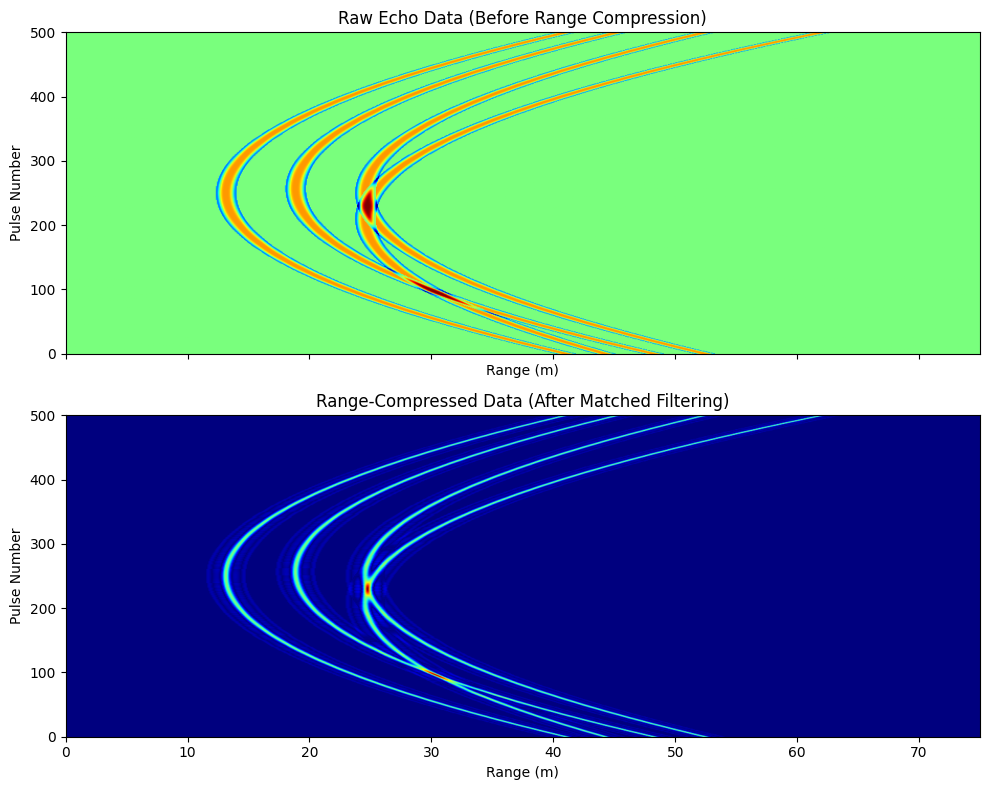

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Radar and simulation parameters
c = 3e8  # Speed of light (m/s)
pulse_duration = 5e-7  # Pulse duration (s)
B = 10e6  # Bandwidth (Hz)
sampling_rate = 4 * B  # Sampling rate
chirp_rate = B / pulse_duration  # Chirp rate (Hz/s)
pulse_width = pulse_duration * c / 2  # Pulse width in meters

# Collection parameters
satellite_velocity = 7.5*1e3  # m/s
collection_time = 10  # seconds
aperture_length = satellite_velocity * collection_time  # Synthetic aperture length
incidence_angle = 30  # degrees
number_of_pulses = 500 # number of simulated pulses

# Define SAR imaging geometry
x_start, x_end = -aperture_length / 2, aperture_length / 2  # Satellite trajectory (km)
altitude = 500e3  # Satellite altitude (km)
ground_scene_center = (0.0, 0.0, 0.0)  # Scene center at (0,0,0)
y_const = altitude * np.tan(np.radians(incidence_angle))  # Fixed Y position for imaging

# Compute satellite positions along its flight path
x_positions = np.linspace(x_start, x_end, number_of_pulses)

# Define multiple target positions in the ground coordinate system (meters)
ground_targets = np.array([
    [1000, 500, 0],  # Target 1 (100m right of center)
    [-6000, 0, 0],  # Target 2 (100m left of center)
    [0, 1000, 0],  # Target 3 (50m ahead, 100m right)
    [0, 0, 0],  # Target 4 (75m left, 50m behind)
])

# Compute range history for each target based on satellite motion
range_history = np.zeros((number_of_pulses, len(ground_targets)))

for pulse_idx, x_sat in enumerate(x_positions):
    for target_idx, target in enumerate(ground_targets):
        target_x, target_y, target_z = target

        # Compute range as the Euclidean distance from the satellite to the target
        range_history[pulse_idx, target_idx] = np.sqrt(
            (x_sat - target_x) ** 2 + (y_const - target_y) ** 2 + (altitude - target_z) ** 2
        )

# Determine timing for echoes based on computed ranges
min_range = np.min(range_history)
max_range = np.max(range_history)
range_interval = max_range - min_range
range_margin = 0.5 * range_interval
range0 = min_range - pulse_width / 2 - range_margin / 2
total_time = 2 * (range_interval + pulse_width + range_margin) / c
range_total = total_time * c / 2
num_samples = int(total_time * sampling_rate)
t = np.linspace(0, total_time, num_samples, endpoint=False)  # Time axis

# Functions for chirp signal simulation
def rect(t, width=1.0, center=0.0):
    """Returns a rectangular pulse centered at 'center' with width 'width'."""
    return np.where((t >= center - width / 2) & (t <= center + width / 2), 1.0, 0.0)

def chirp_signal(t, chirp_rate=1.0):
    """Generates a chirp signal s(t) = exp(j * pi * chirp_rate * t^2)."""
    return np.exp(1j * np.pi * chirp_rate * t**2)

# Simulate raw chirp echoes
pulses_2d = np.zeros((number_of_pulses, num_samples), dtype=np.complex64)  # Raw data storage

# Simulate echoes from targets for each pulse
for pulse_idx in range(number_of_pulses):
    for target_idx in range(len(ground_targets)):
        # Compute current range delay
        target_range = range_history[pulse_idx, target_idx]
        delay = 2 * (target_range - range0) / c  # Convert range to time delay

        # Generate the target echo signal
        echo_signal = chirp_signal(t - delay, chirp_rate) * rect(t, pulse_duration, delay)
        
        # Sum echoes to simulate received signal for this pulse
        pulses_2d[pulse_idx, :] += echo_signal

# Apply range compression (matched filtering)
reference_chirp = chirp_signal(t, chirp_rate)  # Ideal transmitted chirp
range_compressed_2d = np.zeros_like(pulses_2d, dtype=np.complex64)
for pulse_idx in range(number_of_pulses):
    # Calculate cross-correlation for this pulse
    for i, shift in enumerate(t):
        shifted_ref = chirp_signal(t - shift, chirp_rate) * rect(t, pulse_duration, shift)
        overlap =  pulses_2d[pulse_idx, :] * np.conjugate(shifted_ref)
        range_compressed_2d[pulse_idx, i] = np.sum(overlap)
    
# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Raw echo data
ax1.imshow(
    np.real(pulses_2d),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[0, pulse_duration * c / 2, 0, number_of_pulses]
)
ax1.set_title('Raw Echo Data (Before Range Compression)')
ax1.set_ylabel('Pulse Number')
ax1.set_xlabel('Range (m)')

# Range-compressed data
ax2.imshow(
    np.abs(range_compressed_2d),
    aspect='auto',
    origin='lower',
    cmap='jet',
    extent=[0, pulse_duration * c / 2, 0, number_of_pulses]
)
ax2.set_title('Range-Compressed Data (After Matched Filtering)')
ax2.set_ylabel('Pulse Number')
ax2.set_xlabel('Range (m)')

plt.tight_layout()
plt.show()